In [103]:
import pandas as pd
# Paso 1: Cargar el dataset
df = pd.read_csv('E:/Bootcamp/videogame/vgsales.csv')

In [104]:
#Paso 1.1: Verificar duplicados
duplicados = df.duplicated().sum()
print(f"Número de duplicados: {duplicados}")

# Eliminar duplicados
df.drop_duplicates(inplace=True)


Número de duplicados: 0


In [105]:
# Paso 1.2: Verificar tipos de datos
print(df.dtypes)

# Ajustar tipos de datos si es necesario
df['Year'] = pd.to_datetime(df['Year'])
df['Global_Sales'] = df['Global_Sales'].astype(float)  # Ejemplo: convertir ventas a float


Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [106]:
# Paso 1.3 Convertir a minúsculas para la consistencia
df['Genre'] = df['Genre'].str.lower().str.strip()

# Opcional: verificar valores únicos
print(df['Genre'].unique())

['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy']


In [107]:
#Paso 1.4: Verificar valores faltantes
print(df.isnull().sum())

# Rellenar los valores faltantes (ejemplo con la media)
df['Global_Sales'].fillna(df['Global_Sales'].mean(), inplace=True)


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


C:\Users\chave\AppData\Local\Temp\ipykernel_3636\2597265465.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Global_Sales'].fillna(df['Global_Sales'].mean(), inplace=True)


In [108]:
#Paso 1.5 Identificar datos anómalos, los cuales son los videojuegos con ventas negativas, borrando el dataset dichos valores
anomalos = df[df['Global_Sales'] < 0]
print("Datos anómalos encontrados:")
print(anomalos)

# Eliminar dichos datos anómalos
df = df[df['Global_Sales'] >= 0]

Datos anómalos encontrados:
Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []


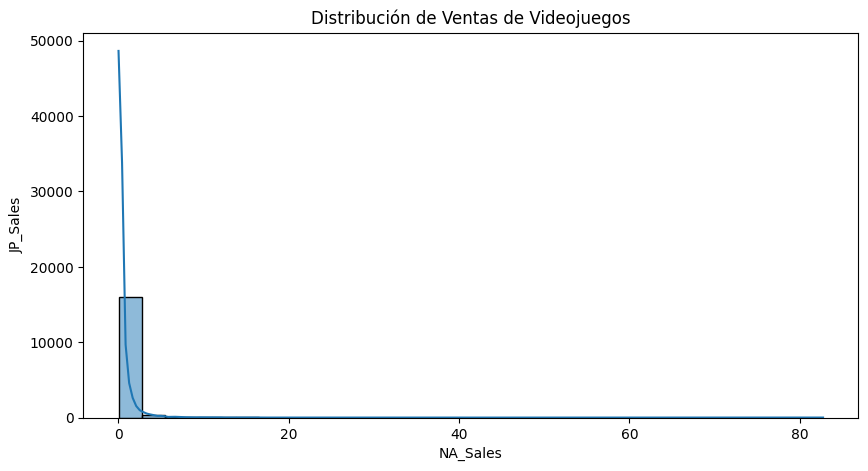

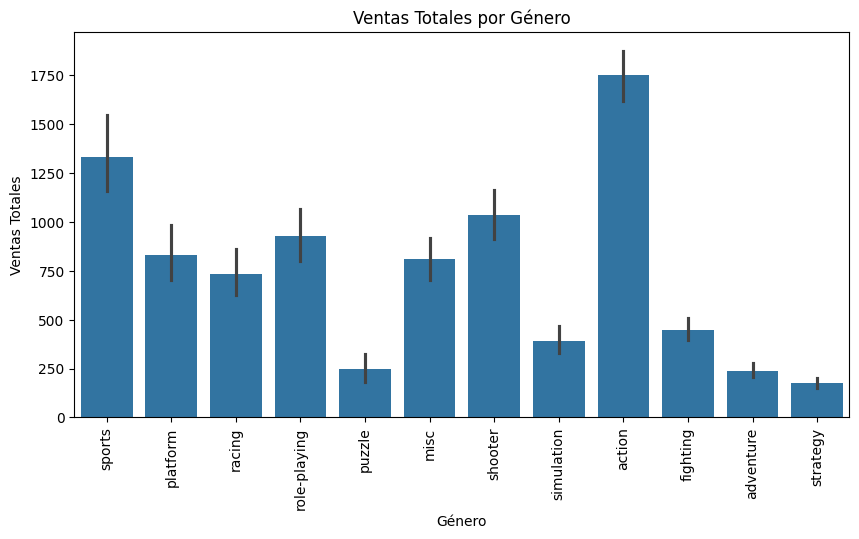

In [109]:
#Paso 2
import matplotlib.pyplot as plt
import seaborn as sns
# Histograma de ventas
plt.figure(figsize=(10, 5))
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title('Distribución de Ventas de Videojuegos')
plt.xlabel('NA_Sales')
plt.ylabel('JP_Sales')
plt.show()
# Interpretación: La mayoría de los videojuegos tienen ventas concentradas en un rango bajo, con pocos alcanzando altos niveles de ventas.

# Gráfico de barras de ventas por género
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Genre', y='Global_Sales', estimator=sum)
plt.title('Ventas Totales por Género')
plt.xticks(rotation=90)
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.show()
# Interpretación: La preferencia de la gente en los tipos de juegos son los de accion

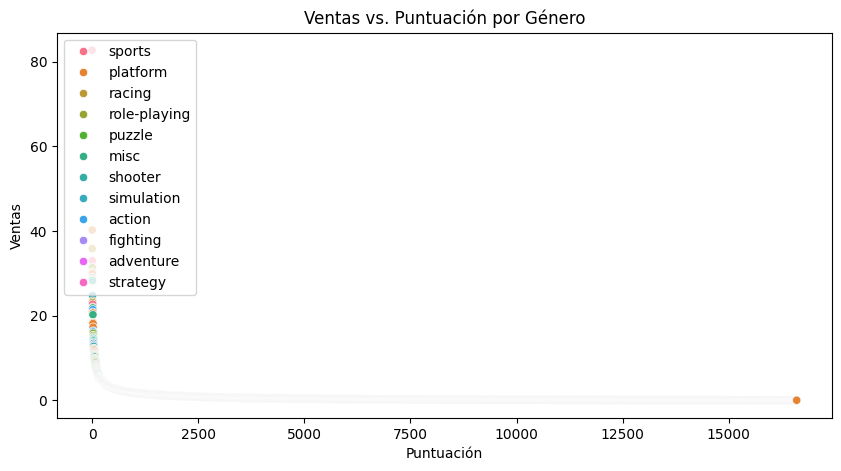

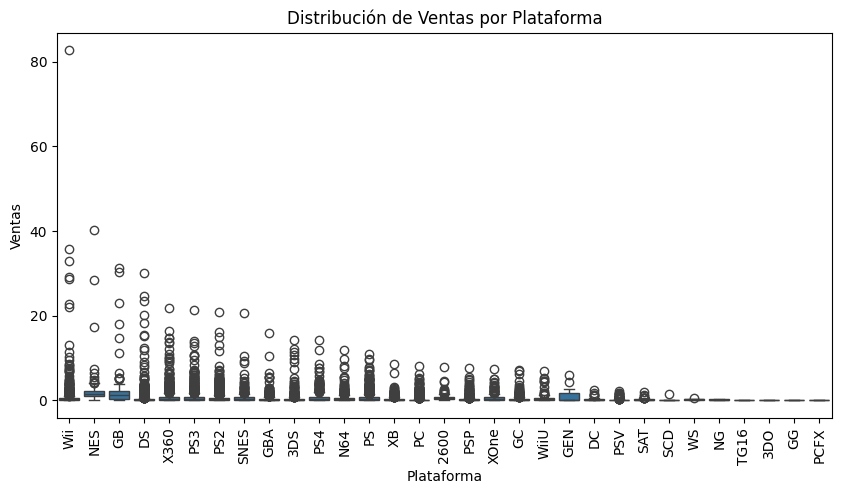

In [110]:
# Gráfico de dispersión: ventas vs. posicion en el ranking
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Rank', y='Global_Sales', hue='Genre')
plt.title('Ventas vs. Puntuación por Género')
plt.xlabel('Puntuación')
plt.ylabel('Ventas')
plt.legend(loc='upper left')
plt.show()
#Existe claramente una tendencia de que los juegos mejor posicionados en el ranking son los que tienen mejores ventas

# Gráfico de cajas: ventas por plataforma
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Platform', y='Global_Sales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.xticks(rotation=90)
plt.title('Distribución de Ventas por Plataforma')
plt.show()
#Hay plataformas que abarcan muchos tipos de juegos, por lo tanto sus ventas se dispersan.

In [111]:
# Resumen estadístico
print(df.describe())


               Rank                           Year      NA_Sales  \
count  16598.000000                          16327  16598.000000   
mean    8300.605254  1970-01-01 00:00:00.000002006      0.264667   
min        1.000000  1970-01-01 00:00:00.000001980      0.000000   
25%     4151.250000  1970-01-01 00:00:00.000002003      0.000000   
50%     8300.500000  1970-01-01 00:00:00.000002007      0.080000   
75%    12449.750000  1970-01-01 00:00:00.000002010      0.240000   
max    16600.000000  1970-01-01 00:00:00.000002020     41.490000   
std     4791.853933                            NaN      0.816683   

           EU_Sales      JP_Sales   Other_Sales  Global_Sales  
count  16598.000000  16598.000000  16598.000000  16598.000000  
mean       0.146652      0.077782      0.048063      0.537441  
min        0.000000      0.000000      0.000000      0.010000  
25%        0.000000      0.000000      0.000000      0.060000  
50%        0.020000      0.000000      0.010000      0.170000  
75%

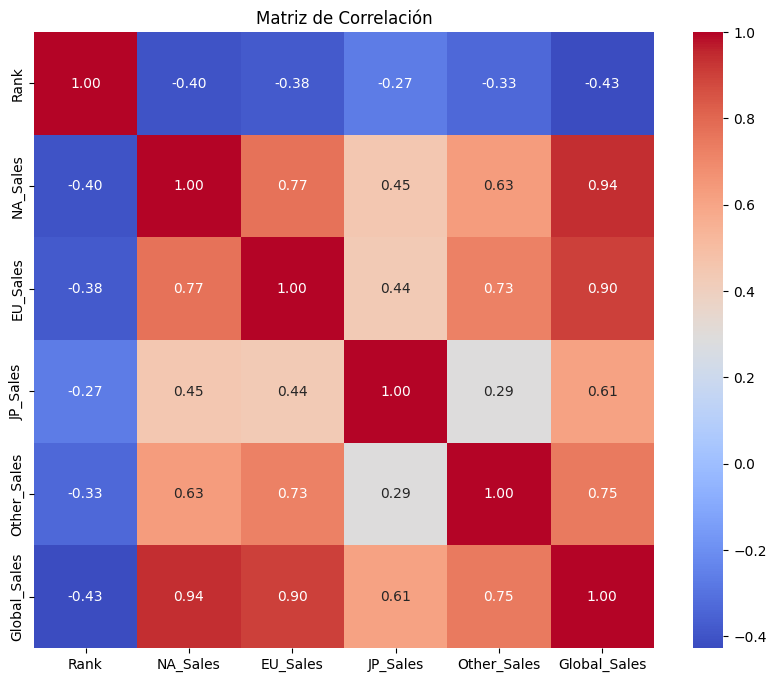

In [112]:
# Matriz de correlación
# Seleccionando solamente columnas numericas antes de hacer la correlacion
numerical_df = df.select_dtypes(include=['number'])
correlacion = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()
# Se identifica cuales son las correlaciones más fuertes entre variables, por ejemplo, entre puntuaciones y ventas.


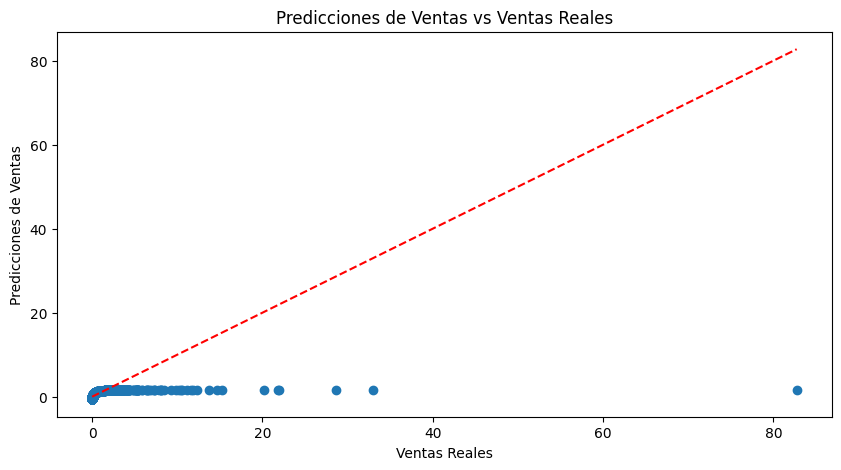

In [113]:
#Importando las librerias para la regresion lineal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer 

# Seleccionar las caractericas y el objetivo de las variables
X = df[['Rank']]  # Por ejemplo, solo usando la puntuación
y = df['Global_Sales']

# 1. Aplicando la imputacion: reeeplazando con la media
imputer = SimpleImputer(strategy='mean')  # Creando una sentencia de imputacion
X = imputer.fit_transform(X)  # Ajustando y reeplazando la imputacion

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de datos
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Aplicando las predicciones
predicciones = modelo.predict(X_test)

# Visualizando las predicciones
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predicciones)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Línea de referencia
plt.xlabel('Ventas Reales')
plt.ylabel('Predicciones de Ventas')
plt.title('Predicciones de Ventas vs Ventas Reales')
plt.show()
# Se bbserva la tendencia de las predicciones en comparacion con las ventas reales de los videojuegos.